In [14]:
# Step - 1: Load the DataSet

In [15]:
import pandas as pd

df = pd.read_csv("ECDC_surveillance_data_Leptospirosis.csv")

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31773 entries, 0 to 31772
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HealthTopic    31773 non-null  object
 1   Population     31773 non-null  object
 2   Distribution   31773 non-null  object
 3   Unit           31773 non-null  object
 4   Time           31773 non-null  int64 
 5   RegionCode     31773 non-null  object
 6   RegionName     31773 non-null  object
 7   CategoryIndex  31773 non-null  int64 
 8   Category       31773 non-null  object
 9   Value          31773 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.4+ MB
None
     HealthTopic       Population       Distribution      Unit  Time  \
0  Leptospirosis  Confirmed cases  Age-specific rate  N/100000  2007   
1  Leptospirosis  Confirmed cases  Age-specific rate  N/100000  2007   
2  Leptospirosis  Confirmed cases  Age-specific rate  N/100000  2007   
3  Leptospirosis  Confirmed case

In [16]:
# Step - 2: Clean the DataSet

In [17]:
# Replace '-' with NaN and convert 'Value' to numeric
df['Value'] = df['Value'].replace('-', float('nan')).astype(float)

# Filter for confirmed cases and age-specific rates
df_cleaned = df[(df['Population'] == 'Confirmed cases') & 
                (df['Distribution'] == 'Age-specific rate')]

# Drop unnecessary columns
df_cleaned = df_cleaned[['Time', 'RegionName', 'Category', 'Value']]

# Rename columns for clarity
df_cleaned.rename(columns={'Time': 'Year', 'RegionName': 'Country', 'Category': 'AgeGroup', 'Value': 'Rate'}, inplace=True)

# Display cleaned data
print(df_cleaned.head())

   Year  Country AgeGroup  Rate
0  2007  Austria      0-4   NaN
1  2007  Austria     5-14   NaN
2  2007  Austria    15-24   NaN
3  2007  Austria    25-44   NaN
4  2007  Austria    45-64   NaN


In [18]:
# Step - 3: Analysing the DataSet

In [21]:
# Questions to be Answered:-

# Trends Over Time :
# How do leptospirosis rates change over the years?
# Are there specific years with spikes in cases?

# Regional Analysis :
# Which countries have the highest rates of leptospirosis?
# Are there regional clusters?

# Age Group Analysis :
# Which age groups are most affected?


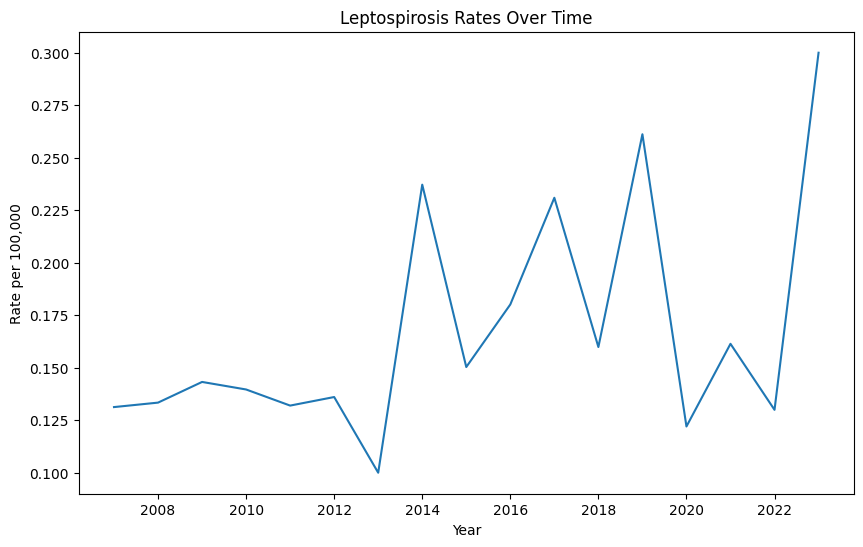

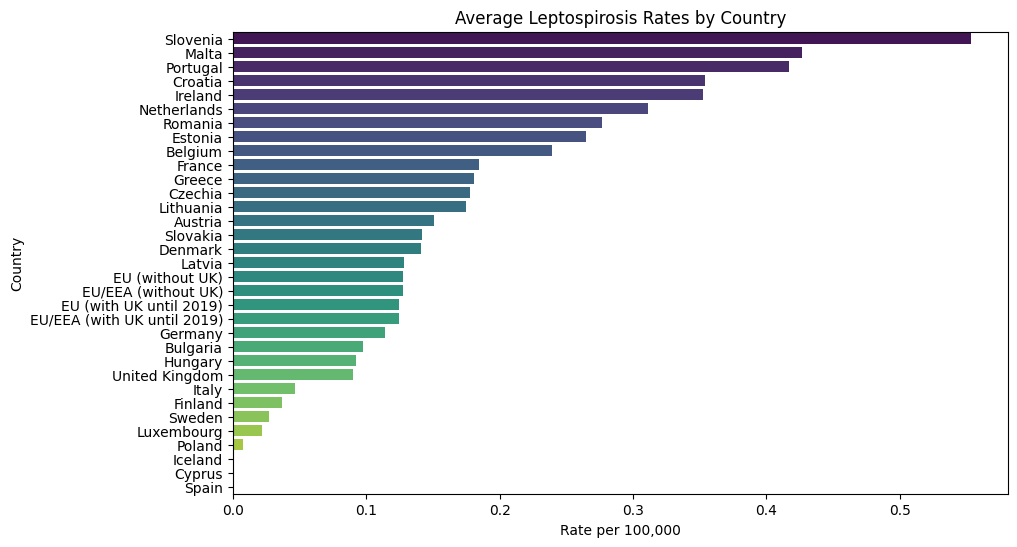

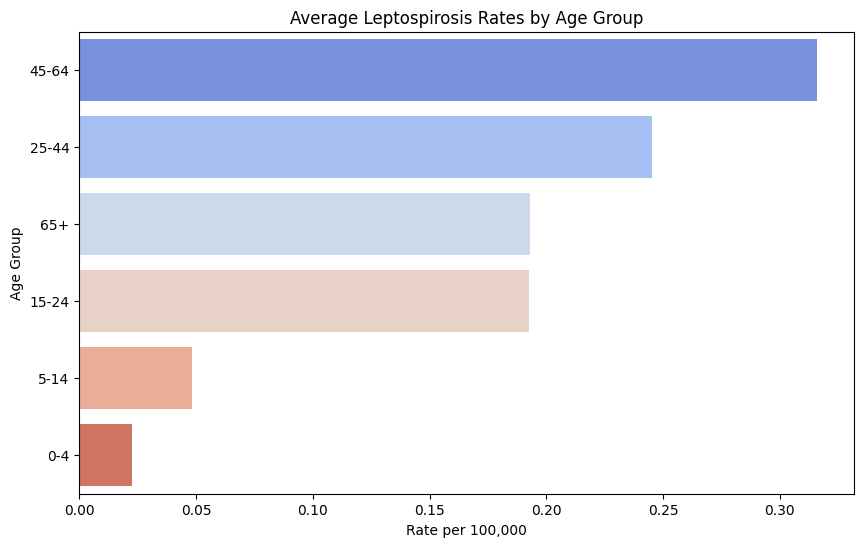

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='Year', y='Rate', errorbar=None)
plt.title("Leptospirosis Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Rate per 100,000")
plt.show()

# Regional analysis
regional_summary = df_cleaned.groupby('Country')['Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_summary.values, 
            y=regional_summary.index, 
            hue=regional_summary.index,         
            palette='viridis', 
            dodge=False)                        
plt.title("Average Leptospirosis Rates by Country")
plt.xlabel("Rate per 100,000")
plt.ylabel("Country")
plt.show()

# Age group analysis
age_group_summary = df_cleaned.groupby('AgeGroup')['Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_summary.values, 
            y=age_group_summary.index,
            hue = age_group_summary.index,
            palette='coolwarm',
           dodge=False)
plt.title("Average Leptospirosis Rates by Age Group")
plt.xlabel("Rate per 100,000")
plt.ylabel("Age Group")
plt.show()